### Q7b)

In [24]:
# Imports
import pandas as pd

In [25]:
flow_data = pd.read_csv('../../datasets/flows.csv')
flow_data.head(5)

,day,month,year,flow_m3_s
0,1,1,1970,29.36
1,2,1,1970,28.88
2,3,1,1970,27.99
3,4,1,1970,23.61
4,5,1,1970,21.95


### Check for missing:
* any missing data
* any erroneous data (e.g. negative, or large values which are clearly incorrect)
* any samples which are too small or not matching in size if they are to be compared against other samples


In [26]:
# using isnull() function
flow_data.isnull().head(5)

,day,month,year,flow_m3_s
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False


In [27]:
# Any missing values?
flow_data.isnull().values.any()

True

In [28]:
print(flow_data.isnull().values.sum())

6


### Remove missing values

In [29]:
flow_data = flow_data.dropna()
print(flow_data.isnull().values.sum())

0


### Copy data

In [30]:
flow_data_copy = flow_data.copy()

### Transform the data to time series format

In [31]:
flow_data_copy['dateInt'] = flow_data_copy['year'].astype(str) + flow_data_copy['month'].astype(str).str.zfill(2)+ flow_data_copy['day'].astype(str).str.zfill(2)
flow_data_copy['Date'] = pd.to_datetime(flow_data_copy['dateInt'], format='%Y%m%d')
flow_data_copy.head(5)

,day,month,year,flow_m3_s,dateInt,Date
0,1,1,1970,29.36,19700101,1970-01-01
1,2,1,1970,28.88,19700102,1970-01-02
2,3,1,1970,27.99,19700103,1970-01-03
3,4,1,1970,23.61,19700104,1970-01-04
4,5,1,1970,21.95,19700105,1970-01-05


In [32]:
monthly_flow_data_series =  flow_data_copy.filter(['Date', 'flow_m3_s'], axis=1)
monthly_flow_data_series = monthly_flow_data_series.set_index('Date').resample('M').sum()
monthly_flow_data_series.head(5)

,flow_m3_s
Date,
1970-01-31,2147.32
1970-02-28,2032.02
1970-03-31,1112.22
1970-04-30,1918.95
1970-05-31,649.94


### Calculate the observed data flow using formula (given in the question description)

In [33]:
flow_data_copy.groupby([flow_data_copy['Date'].dt.year, flow_data_copy['Date'].dt.month, flow_data_copy['Date'].dt.week]).agg(['sum', 'mean', 'std']).head(5)

/var/folders/qb/fvvyb5ks2nd3hqyvm2stxxjh0000gn/T/ipykernel_1496/811550904.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  flow_data_copy.groupby([flow_data_copy['Date'].dt.year, flow_data_copy['Date'].dt.month, flow_data_copy['Date'].dt.week]).agg(['sum', 'mean', 'std']).head(5)
/var/folders/qb/fvvyb5ks2nd3hqyvm2stxxjh0000gn/T/ipykernel_1496/811550904.py:1: FutureWarning: ['Date'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  flow_data_copy.groupby([flow_data_copy['Date'].dt.year, flow_data_copy['Date'].dt.month, flow_data_copy['Date'].dt.week]).agg(['sum', 'mean', 'std']).head(5)


day                 month             year               \
                sum  mean       std   sum mean  std    sum    mean  std   
Date Date Date                                                            
1970 1    1      10   2.5  1.290994     4  1.0  0.0   7880  1970.0  0.0   
          2      56   8.0  2.160247     7  1.0  0.0  13790  1970.0  0.0   
          3     105  15.0  2.160247     7  1.0  0.0  13790  1970.0  0.0   
          4     154  22.0  2.160247     7  1.0  0.0  13790  1970.0  0.0   
          5     171  28.5  1.870829     6  1.0  0.0  11820  1970.0  0.0   

               flow_m3_s                         \
                     sum        mean        std   
Date Date Date                                    
1970 1    1       109.84   27.460000   2.628675   
          2       329.58   47.082857  43.544004   
          3       584.56   83.508571  22.398309   
          4       810.78  115.825714  29.203166   
          5       312.56   52.093333  13.576404   

                                                          dateInt  \
                                                              sum   
Date Date Date                                                      
1970 1    1                      19700101197001021970010319700104   
          2     1970010519700106197001071970010819700109197001...   
          3     1970011219700113197001141970011519700116197001...   
          4     1970011919700120197001211970012219700123197001...   
          5      197001261970012719700128197001291970013019700131   

                                        
                        mean       std  
Date Date Date                          
1970 1    1     4.925025e+30  1.290994  
          2     2.814301e+54  2.160247  
          3     2.814302e+54  2.160247  
          4     2.814303e+54  2.160247  
          5     3.283354e+46  1.870829

In [34]:
int(flow_data_copy.Date.dt.strftime('%d')[0])

1

In [35]:
u_t = monthly_flow_data_series.flow_m3_s.mean()
u_t

1563.326249329759

In [36]:
a_t = monthly_flow_data_series.flow_m3_s.std()
a_t

1129.7573489097852

### Correlation for monthly series.

In [37]:
#monthly_rainfall_data_series = monthly_rainfall_data_series.squeeze(axis=0)
monthly_flow_data_series['flow_m3_s'].squeeze().autocorr(lag=2)

0.18050767385939212

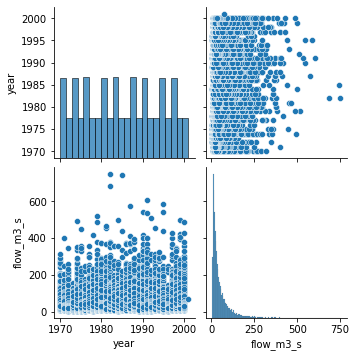

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(flow_data_copy.iloc[:,2:5], kind="scatter")
plt.show()

### Comment:
Generally, duration does not increase from daily to annual. The duration of rainfall is important in constructing IDF curve. The maximum considered is usually 24 hrs. which is termed 24 hr. storm. This is applicable in design storm but not historical. The essence of the duration is to determine the peak discharge. A short duration rainfall is characterized with high intensity depending on the frequency (return period). And comparing the different lags, monthly correlation of 2 lags gives the highest coefficient. 